In [1]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix,greycoprops
import pandas as pd
import cv2
from skimage.measure import label,regionprops
import skimage

In [2]:
slices=[]
proList = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy']
featlist = ['sumValue','contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy','hue','value', 'saturaton','label']
properties =np.zeros(6)
glcmMatrix = []
final=[]
crop = "potato"
folders = ["Potato___Early_blight","Potato___healthy","Potato___Late_blight"]

Potato___Early_blight
0
Potato___healthy
1
Potato___Late_blight
2


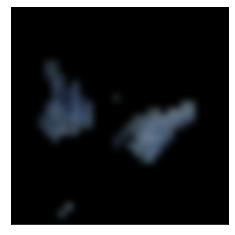

In [3]:
for folder in folders:
    print(folder)
    labell=folders.index(folder)
    print(labell)
    #INPUT_SCAN_FOLDER=folder
    INPUT_SCAN_FOLDER="C:/Users/bhuwan/OneDrive/Desktop/potato-disease/input/data/disease/"+folder+"/"

    image_folder_list = os.listdir(INPUT_SCAN_FOLDER)

    for i in range(len(image_folder_list)):

        abc =cv2.imread(INPUT_SCAN_FOLDER+image_folder_list[i])

        #blur1 = cv2.GaussianBlur(abc,(51,51),1)
        
        dim = (32, 32)
#       inter_coubic , linear, nearest  
        resized = cv2.resize(abc, dim, interpolation = cv2.INTER_AREA)
        #print('Resized Dimensions : ',resized.shape)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()

        
        

        gray_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)



        
        lower_red = np.array([5,50,50])
        upper_red  = np.array([20,255,255])
        mask = cv2.inRange(hsv,lower_red,upper_red)
        res = cv2.bitwise_and(resized,resized,mask=mask)
        plt.imshow(res,cmap='Blues', interpolation = 'bicubic')
        plt.xticks([]),plt.yticks([])

        
        sum=0
        result=res.flatten()
        #print(len(result))
        for k in range(3072):
            sum+=result[k]^2
        #print(sum)
        sqsum=math.sqrt(sum)
        #print(sqsum)

        h,s,v = cv2.split(hsv)
        h_mean = np.mean(h)
        h_mean = np.mean(h_mean)

        s_mean = np.mean(s)
        s_mean = np.mean(s_mean)

        v_mean = np.mean(v)
        v_mean = np.mean(v_mean)



        glcmMatrix = (greycomatrix(gray_image, [1], [0], levels=2 ** 8))
        
        
        for j in range(0, len(proList)):
            properties[j] = (greycoprops(glcmMatrix, prop=proList[j]))

        #print("properties are:")
        #print(properties)

        features =np.array([sqsum,properties[0], properties[1], properties[2], properties[3], properties[4],h_mean,s_mean,v_mean,labell])
        final.append(features)
#print(len(final))


In [4]:
print(sqsum)

177.19762978098777


In [6]:
df = pd.DataFrame(final, columns=featlist)
df.to_csv("glfeat.csv")
s=pd.read_csv("glfeat.csv")
# for i in s.iterrows():
#      print(i)

In [6]:
import pandas as pd
df = pd.read_csv('glfeat.csv')
df.head()

,Unnamed: 0,sumValue,contrast,dissimilarity,homogeneity,ASM,energy,hue,value,saturaton,path,label
0,0,141.109886,899.034274,19.256048,0.109775,0.001272,0.035669,71.058594,70.483398,125.934570,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0
1,1,141.728614,975.907258,18.094758,0.160163,0.001545,0.039302,79.957031,61.142578,151.107422,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0
2,2,86.000000,615.548387,14.080645,0.153138,0.001325,0.036402,82.117188,44.143555,147.919922,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0
3,3,78.383672,412.323589,11.591734,0.155581,0.001368,0.036984,90.853516,54.087891,135.036133,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0
4,4,89.587946,374.199597,11.328629,0.165414,0.001370,0.037011,82.905273,50.202148,150.997070,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0


Potato___Late_blight
2


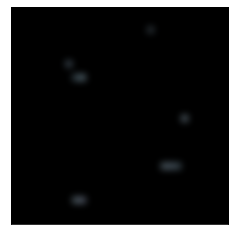

In [7]:

print(folder)
labell=folders.index(folder)
print(labell)
#INPUT_SCAN_FOLDER=folder
INPUT_SCAN_FOLDER="C:/Users/bhuwan/OneDrive/Desktop/potato-disease/input/data/disease/Potato___Early_blight/0a47f32c-1724-4c8d-bfe4-986cedd3587b___RS_Early.B-8001.jpg"

# image_folder_list = os.listdir(INPUT_SCAN_FOLDER)

abc =cv2.imread(INPUT_SCAN_FOLDER)

#blur1 = cv2.GaussianBlur(abc,(51,51),1)

dim = (32, 32)
#       inter_coubic , linear, nearest  
resized = cv2.resize(abc, dim, interpolation = cv2.INTER_AREA)
#print('Resized Dimensions : ',resized.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()




gray_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)




lower_red = np.array([5,50,50])
upper_red  = np.array([20,255,255])
mask = cv2.inRange(hsv,lower_red,upper_red)
res = cv2.bitwise_and(resized,resized,mask=mask)
plt.imshow(res,cmap='Blues', interpolation = 'bicubic')
plt.xticks([]),plt.yticks([])


sum=0
result=res.flatten()
#print(len(result))
for k in range(3072):
    sum+=result[k]^2
#print(sum)
sqsum=math.sqrt(sum)
#print(sqsum)



h,s,v = cv2.split(hsv)

h_mean = np.mean(h)
h_mean = np.mean(h_mean)

s_mean = np.mean(s)
s_mean = np.mean(s_mean)

v_mean = np.mean(v)
v_mean = np.mean(v_mean)





glcmMatrix = (greycomatrix(gray_image, [1], [0], levels=2 ** 8))


for j in range(0, len(proList)):
    properties[j] = (greycoprops(glcmMatrix, prop=proList[j]))

#print("properties are:")
#print(properties)

features =np.array([sqsum,properties[0], properties[1], properties[2], properties[3], properties[4],h_mean,s_mean,v_mean,INPUT_SCAN_FOLDER,labell])
final.append(features)
#print(len(final))


In [8]:
import pandas as pd
df = pd.read_csv('leaf_feature.csv')
df.head()

,Unnamed: 0,sumValue,contrast,dissimilarity,homogeneity,ASM,energy,hue,value,saturaton,path,label
0,0,141.109886,899.034274,19.256048,0.109775,0.001272,0.035669,71.058594,70.483398,125.934570,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0
1,1,141.728614,975.907258,18.094758,0.160163,0.001545,0.039302,79.957031,61.142578,151.107422,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0
2,2,86.000000,615.548387,14.080645,0.153138,0.001325,0.036402,82.117188,44.143555,147.919922,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0
3,3,78.383672,412.323589,11.591734,0.155581,0.001368,0.036984,90.853516,54.087891,135.036133,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0
4,4,89.587946,374.199597,11.328629,0.165414,0.001370,0.037011,82.905273,50.202148,150.997070,C:/Users/bhuwan/OneDrive/Desktop/potato-diseas...,0


In [ ]:
hsv